In [1]:
import uproot, pylhe, glob, os
import numpy as np
import numba,vector
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd 
import seaborn as sns

In [2]:
lhe_signal=glob.glob("/localscratch/Samples/Signal/SM/WWW01j_000[0-4].lhe.gz")
root_signal=glob.glob("/localscratch/Samples/Signal/SM/WWW01j_000[0-4].root")

lhe_bkg=glob.glob("/localscratch/Samples/3l01j/3l01j_00[0-1]?.lhe.gz")
root_bkg=glob.glob("/localscratch/Samples/3l01j/3l01j_00[0-1]?.root")

print(root_bkg)

['/localscratch/Samples/3l01j/3l01j_0018.root', '/localscratch/Samples/3l01j/3l01j_0013.root', '/localscratch/Samples/3l01j/3l01j_0007.root', '/localscratch/Samples/3l01j/3l01j_0001.root', '/localscratch/Samples/3l01j/3l01j_0012.root', '/localscratch/Samples/3l01j/3l01j_0015.root', '/localscratch/Samples/3l01j/3l01j_0006.root', '/localscratch/Samples/3l01j/3l01j_0002.root', '/localscratch/Samples/3l01j/3l01j_0010.root', '/localscratch/Samples/3l01j/3l01j_0016.root', '/localscratch/Samples/3l01j/3l01j_0008.root', '/localscratch/Samples/3l01j/3l01j_0009.root', '/localscratch/Samples/3l01j/3l01j_0014.root', '/localscratch/Samples/3l01j/3l01j_0005.root', '/localscratch/Samples/3l01j/3l01j_0019.root', '/localscratch/Samples/3l01j/3l01j_0000.root', '/localscratch/Samples/3l01j/3l01j_0004.root', '/localscratch/Samples/3l01j/3l01j_0003.root', '/localscratch/Samples/3l01j/3l01j_0017.root', '/localscratch/Samples/3l01j/3l01j_0011.root']


In [3]:
def get_xSection(lhefiles):
    init=pylhe.read_lhe_init(lhefiles[0])

    xSection=0.
    for process in init['procInfo']:
        xSection+=process['xSection']
    return xSection # in pb

In [4]:
def getNeventsLHE(lhefiles):
    N=0
    for f in lhefiles:
        lines=os.popen('zgrep "</event>" '+f+"|wc -l").readlines()
        N+=int(lines[0])
    return N

In [5]:
xSection_sig=get_xSection(lhe_signal)
xSection_bkg=get_xSection(lhe_bkg)
print(xSection_sig,xSection_bkg)

0.017245120000000003 0.8901096


In [6]:
N_lhe_sig=1000000 #getNeventsLHE(lhe_signal)
N_lhe_bkg=4000000 #getNeventsLHE(lhe_bkg)
print(N_lhe_sig,N_lhe_bkg)

1000000 4000000


In [7]:
def getNeventsRoot(rootfiles):
    N=0
    for f in rootfiles:
        with uproot.open(f+':Delphes') as tree:
            N+=tree.num_entries
    return N

In [8]:
N_root_sig=511723 #getNeventsRoot(root_signal)
N_root_bgk=2964674 #getNeventsRoot(root_bkg)
print(N_root_sig,N_root_bgk)

511723 2964674


In [9]:
#calculate resulting xSection*efficiency
xSection_sig*=N_root_sig/N_lhe_sig
xSection_bkg*=N_root_bgk/N_lhe_bkg
print(xSection_sig,xSection_bkg)

0.008824724541760002 0.6597211970676


In [10]:
#show available branches
tree=uproot.open(root_signal[0]+':Delphes')
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.ReadTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.ProcTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.MPI      | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Scale    | 

In [11]:
#show only specifc elements
tree['MissingET'].show(filter_name="MissingET.*")

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
MissingET            | int32_t                  | AsDtype('>i4')                
MissingET.fUniqueID  | uint32_t[]               | AsJagged(AsDtype('>u4'))
MissingET.fBits      | uint32_t[]               | AsJagged(AsDtype('>u4'))
MissingET.MET        | float[]                  | AsJagged(AsDtype('>f4'))
MissingET.Eta        | float[]                  | AsJagged(AsDtype('>f4'))
MissingET.Phi        | float[]                  | AsJagged(AsDtype('>f4'))


In [12]:

tree['Electron'].show(filter_name="Electron.*", name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
Electron                                 | int32_t                  | AsDtype('>i4')                
Electron.fUniqueID                       | uint32_t[]               | AsJagged(AsDtype('>u4'))
Electron.fBits                           | uint32_t[]               | AsJagged(AsDtype('>u4'))
Electron.PT                              | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Eta                             | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Phi                             | float[]                  | AsJagged(AsDtype('>f4'))
Electron.T                               | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Charge                          | int32_t[]                | AsJagged(AsDtype('>i4'))
Electron.EhadOverEem            

In [13]:
#specify the variables we are interested in
tree.keys(filter_name="/(MissingET.(MET|Phi)|Particle.(PID|Status)|Electron.(PT|Eta|Phi|Charge)|"
          "Muon.(PT|Eta|Phi|Charge)|Jet.(PT|Eta|Phi))/")

['Particle/Particle.PID',
 'Particle/Particle.Status',
 'Jet/Jet.PT',
 'Jet/Jet.Eta',
 'Jet/Jet.Phi',
 'Jet/Jet.PTD',
 'Electron/Electron.PT',
 'Electron/Electron.Eta',
 'Electron/Electron.Phi',
 'Electron/Electron.Charge',
 'Muon/Muon.PT',
 'Muon/Muon.Eta',
 'Muon/Muon.Phi',
 'Muon/Muon.Charge',
 'MissingET/MissingET.MET',
 'MissingET/MissingET.Phi']

In [14]:
tree.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.ReadTime',
 'Event/Event.ProcTime',
 'Event/Event.ProcessID',
 'Event/Event.MPI',
 'Event/Event.Weight',
 'Event/Event.CrossSection',
 'Event/Event.CrossSectionError',
 'Event/Event.Scale',
 'Event/Event.AlphaQED',
 'Event/Event.AlphaQCD',
 'Event/Event.ID1',
 'Event/Event.ID2',
 'Event/Event.X1',
 'Event/Event.X2',
 'Event/Event.ScalePDF',
 'Event/Event.PDF1',
 'Event/Event.PDF2',
 'Event_size',
 'Weight',
 'Weight/Weight.fUniqueID',
 'Weight/Weight.fBits',
 'Weight/Weight.Weight',
 'Weight_size',
 'Particle',
 'Particle/Particle.fUniqueID',
 'Particle/Particle.fBits',
 'Particle/Particle.PID',
 'Particle/Particle.Status',
 'Particle/Particle.IsPU',
 'Particle/Particle.M1',
 'Particle/Particle.M2',
 'Particle/Particle.D1',
 'Particle/Particle.D2',
 'Particle/Particle.Charge',
 'Particle/Particle.Mass',
 'Particle/Particle.E',
 'Particle/Particle.Px',
 'Particle/Particle.Py',
 'Particle/Parti

In [15]:
tree['Electron.ErrorD0'].arrays()


<Array [{'Electron.ErrorD0': [0]}, ..., {...}] type='102161 * {"Electron.Er...'>

In [16]:
@numba.jit(nopython=True)
def checkHiggs(batch):
    higgs=np.full((len(batch),),False)
    for i in range(len(batch)):
        for p in range(len(batch[i]['Particle.PID'])):
            if abs(batch[i]['Particle.PID'][p])==25:
                higgs[i]=True
                break
    return higgs

In [17]:
@numba.jit(nopython=True)
def preselection(batch):
    pass_selection=np.full((len(batch),),False)
    for i in range(len(batch)):
        nElectrons=0
        nMuons=0
        nJets=0

        for e in range(len(batch[i]['Electron.PT'])):
            if batch[i]['Electron.PT'][e]>=10.0 and abs(batch[i]['Electron.Eta'][e])<2.5:
                nElectrons+=1


        for m in range(len(batch[i]['Muon.PT'])):
            if batch[i]['Muon.PT'][m]>=10.0 and abs(batch[i]['Muon.Eta'][m])<2.5:
                nMuons+=1

        for j in range(len(batch[i]['Jet.PT'])):
            if batch[i]['Jet.PT'][j]>=25.0 and abs(batch[i]['Jet.Eta'][j])<2.5:
                nJets+=1

        if nElectrons+nMuons==3 and nJets<5:
            pass_selection[i]=True

    return pass_selection
    

In [18]:
@numba.jit(nopython=True)
def get_MET(batch):
    met=np.zeros((len(batch),))
    metPhi=np.zeros((len(batch),))
    for i in range(len(batch)):
        met[i]=float(batch[i]['MissingET.MET'][0])
        metPhi[i]=float(batch[i]['MissingET.Phi'][0])
    return met, metPhi

In [19]:
#selects which data type we are putting through the processing
def batch_selector(batch, decay):
    higgs = checkHiggs(batch)
    presel = preselection(batch)
    if decay == 0:#VH
        batch = batch[np.logical_and(higgs,presel)]
    elif decay == 1:#WWW
        batch = batch[np.logical_and(~higgs,presel)]
    else: #other ie bkg
        batch = batch[presel]
    
    return batch


In [21]:
durchlaeufe = 100; //trials                                               
schrittfolge = 0.01; //stepsize                                      
zaehler = 0; // successful runs                                        
binWeight[10] = [0.000523209,0.0185422,0.0773298,0.1551565,0.19408925,\
0.1874,0.15113275,0.12033775,0.0721813,0.02330715]

a1 = 91187.6*91187.6;
b1 = 1776.82*1776.82;
d1;
e1 = (l2->p4()).E()*(l2->p4()).E();
a2 = (80385.0*80385.0) / 2;
b2 = (l3->p4()).E();
e2 = -(l3->p4()).Pz();
for i in range(0, durchlaeufe):
    alpha1 = 1.0/(i*schrittfolge) # alpha1 > 1 (!)                     
    double c1 = alpha1*(l1->p4()).E()*(l2->p4()).E();
    if((alpha1*alpha1*(l1->p4()).E()*(l1->p4()).E()-b1)>=0){
      d1 = sqrt(alpha1*alpha1*(l1->p4()).E()*(l1->p4()).E()-b1)*cos((l1->p4()).\
Angle((l2->p4()).Vect()));
    } else {continue;} // Abbruch (!)                                           

    // calculate alpha2                                                         
    double f1 = a1*a1*d1*d1*e1 - 4*a1*b1*d1*d1*e1 + 4*b1*b1*d1*d1*e1 - 4*b1*c1*\
c1*d1*d1 + 4*b1*d1*d1*d1*d1*e1;
    double g1 = c1*c1 - d1*d1*e1;
    double alpha2_1;
    double alpha2_2;
    if(f1>=0 && g1!=0){  if np.logical_and((f1>=0 < 1), (g1!=0)) == True: 
      alpha2_1 = (np.sqrt(f1) + a1*c1 - 2*b1*c1) / (2*g1);
      alpha2_2 = (- np.sqrt(f1) + a1*c1 - 2*b1*c1) / (2*g1);
    } else {continue;} // Abbruch (!)                                           

    if(alpha2_1 < 1 && alpha2_2 < 1){continue;} // Abbruch (!)       if np.logical_and((alpha2_1 < 1), (alpha2_2 < 1)) == True:          

    // calculate Px(nu_W), Py(nu_W) via METx, METy                              
    if(alpha2_1 > 1){
      double nuPx_1 = METx - (alpha1-1)*(l1->p4()).E()*sin((l1->p4()).Theta())*\
cos((l1->p4()).Phi()) - (alpha2_1-1)*(l2->p4()).E()*sin((l2->p4()).Theta())*cos\
((l2->p4()).Phi());
      double nuPy_1 = METy - (alpha1-1)*(l1->p4()).E()*sin((l1->p4()).Theta())*\
sin((l1->p4()).Phi()) - (alpha2_1-1)*(l2->p4()).E()*sin((l2->p4()).Theta())*sin\
((l2->p4()).Phi());

      // calculate Pz(nu_W) via m_Z                                             
      double c2_1 = nuPx_1*nuPx_1 + nuPy_1*nuPy_1;
      double d2_1 = - (l3->p4()).Px()*nuPx_1 - (l3->p4()).Py()*nuPy_1;

      double f2_1 = a2*a2*b2*b2 - 2*a2*b2*b2*d2_1 - b2*b2*b2*b2*c2_1 + b2*b2*c2\
_1*e2*e2 + b2*b2*d2_1*d2_1;
      double g2_1 = b2*b2 - e2*e2;
     if(f2_1>=0 && g2_1!=0){
        //double nuPz_1 = (sqrt(f2_1) - a2*e2 + d2_1*e2) / g2_1;                
        //double nuPz_2 = (- sqrt(f2_1) - a2*e2 + d2_1*e2) / g2_1;              
        //zaehler = zaehler + binWeight[(i-1)/10]*binWeight[(int)((1.0/alpha2_1\
)*10.0)]; // successful run (!!!)                                               
        zaehler = zaehler + binWeight[(i-1)/10];
        //zaehler = zaehler + 1;                                                
      }
    }
    if(alpha2_2 > 1){
      double nuPx_2 = METx - (alpha1-1)*(l1->p4()).E()*sin((l1->p4()).Theta())*\
cos((l1->p4()).Phi()) - (alpha2_2-1)*(l2->p4()).E()*sin((l2->p4()).Theta())*cos\
((l2->p4()).Phi());
      double nuPy_2 = METy - (alpha1-1)*(l1->p4()).E()*sin((l1->p4()).Theta())*\
sin((l1->p4()).Phi()) - (alpha2_2-1)*(l2->p4()).E()*sin((l2->p4()).Theta())*sin\
((l2->p4()).Phi());

      // calculate Pz(nu_W) via m_Z                                             
      double c2_2 = nuPx_2*nuPx_2 + nuPy_2*nuPy_2;
      double d2_2 = - (l3->p4()).Px()*nuPx_2 - (l3->p4()).Py()*nuPy_2;

      double f2_2 = a2*a2*b2*b2 - 2*a2*b2*b2*d2_2 - b2*b2*b2*b2*c2_2 + b2*b2*c2\
_2*e2*e2 + b2*b2*d2_2*d2_2;
      double g2_2 = b2*b2 - e2*e2;
    
      if(f2_2>=0 && g2_2!=0){
        //double nuPz_3 = (sqrt(f2_2) - a2*e2 + d2_2*e2) / g2_2;                
        //double nuPz_4 = (- sqrt(f2_2) - a2*e2 + d2_2*e2) / g2_2;              
        //zaehler = zaehler + binWeight[(i-1)/10]*binWeight[(int)((1.0/alpha2_2\
)*10.0)]; // successful run (!!!)                                               
        zaehler = zaehler + binWeight[(i-1)/10];
        //zaehler = zaehler + 1;                                                
      }
    }
  } // end of loop over alpha1                                                  

  double coRRector = 0; for(int coR=0;coR<10;coR++){coRRector = coRRector + 10*\
binWeight[coR];}

  retval = zaehler / (2*coRRector);

  DEBUGclass("returning");
  return retval;
  #endif
}




IndentationError: unindent does not match any outer indentation level (<tokenize>, line 85)

In [45]:
#get l0, l1, l2 where l0 has unique charge, l1 is closest to it and l2 is the other
@numba.jit(nopython=True)
def get_leptons(batch):
    PT_l0=np.full((len(batch),),1000.)
    PT_l1=np.full((len(batch),),1000.)
    PT_l2=np.full((len(batch),),1000.)
    invarM=np.full((len(batch),),1000.)
    invarM_l0l2=np.full((len(batch),),1000.)
    invarM_l1l2=np.full((len(batch),),1000.)
    invarM_l0l1=np.full((len(batch),),1000.)
    E_l1l2=np.full((len(batch),),1000.)
    E_l0l2=np.full((len(batch),),1000.)
    E_l0l1=np.full((len(batch),),1000.)
    transM_l1l2=np.full((len(batch),),1000.)
    transM_l0l2=np.full((len(batch),),1000.)    
    transM_l0l1=np.full((len(batch),),1000.)
    deltaeta_l1l2=np.full((len(batch),),1000.)
    deltaeta_l0l2=np.full((len(batch),),1000.)
    deltaeta_l0l1=np.full((len(batch),),1000.)
    #deltaangle_l1l2=np.full((len(batch),),1000.)
    #deltaangle_l0l2=np.full((len(batch),),1000.)
    #deltaangle_l0l1=np.full((len(batch),),1000.)
    dR_l1l2 = np.full((len(batch),),1000.)
    dR_l0l1 = np.full((len(batch),),1000.)
    dR_l0l2 = np.full((len(batch),),1000.)
    totalP = np.full((len(batch),),1000.)
    DRll=np.full((len(batch),),1000.)
    invarM=np.full((len(batch),),1000.)
    n_jet = np.full((len(batch),),1000.)
    n_btag = np.full((len(batch),),1000.)
    max_PT_jet = np.full((len(batch),),1000.)
    d0_l0 = np.full((len(batch),),1000.)
    d0_l1 = np.full((len(batch),),1000.)
    d0_l2 = np.full((len(batch),),1000.)
    zsin_l0 = np.full((len(batch),),1000.)
    zsin_l1 = np.full((len(batch),),1000.)
    zsin_l2 = np.full((len(batch),),1000.)
    theta_l0 = np.full((len(batch),),1000.)
    theta_l1 = np.full((len(batch),),1000.)
    theta_l2 = np.full((len(batch),),1000.)
    dPhi_metl0 = np.full((len(batch),),1000.)
    dPhi_metl1 = np.full((len(batch),),1000.)
    dPhi_metl2 = np.full((len(batch),),1000.)
    
    met, metPhi = get_MET(batch)
    lepton0s = []
    leptons=[]
    for i in range(len(batch)):
        charges = []
        d0 = []
        #d0sig = []
        dz = []
        n_jet[i] = 0
        n_btag[i] = 0
        #loop over electrons
        for e in range(len(batch[i]['Electron.PT'])):
            l = vector.obj(pt=batch[i]['Electron.PT'][e], 
                                      phi=batch[i]['Electron.Phi'][e], 
                                      eta=batch[i]['Electron.Eta'][e], 
                                      mass=511./1e6)

            charges.append(batch[i]['Electron.Charge'][e])
            d0.append(batch[i]['Electron.D0'][e])
            #d0sig.append(batch[i]['Electron.ErrorD0'][e])
            dz.append(batch[i]['Electron.DZ'][e])
            leptons.append(l)
            
            
        #loop over muons
        for m in range(len(batch[i]['Muon.PT'])):
            l = vector.obj(pt=batch[i]['Muon.PT'][m], 
                                      phi=batch[i]['Muon.Phi'][m], 
                                      eta=batch[i]['Muon.Eta'][m], 
                                      mass=105.66/1e3)
            
            charges.append(batch[i]['Muon.Charge'][m])
            leptons.append(l)
            d0.append(batch[i]['Muon.D0'][m])
            #d0sig.append(batch[i]['Muon.ErrorD0'][m])
            dz.append(batch[i]['Muon.DZ'][m])
            
        jet_pt=[]        
        for j in range(len(batch[i]['Jet.PT'])):
            jet_pt.append(batch[i]['Jet.PT'][j])
            n_jet[i] += 1
        for b in range(len(batch[i]['Jet.BTag'])):
            n_btag[i] += 1
        if n_jet[i] == 0:
            max_PT_jet[i] = 0
        else:
            max_PT_jet[i] = np.max((np.array(jet_pt)))

                           
        #find lepton 0 (has unique charge)
        if charges[0] == charges[1]:
            lepton0s.append(leptons[2])
        elif charges[0] == charges[2]:
            lepton0s.append(leptons[1])
        else:
            lepton0s.append(leptons[0])  

        #find lepton 1 (closest to l0) and label the remaining one lepton 2
        l0 = lepton0s[0]
        mindr=DRll[i]
        for l in leptons:
            if l==l0:
                continue
            if l.deltaR(l0)<mindr:
                mindr=l.deltaR(l0)
                l1 = l
        for l in leptons:
            if l == l0:
                continue 
            elif l== l1:
                continue
            else:
                l2 = l 
        DRll[i] = mindr

        #categorise the d0, d0sig and dz data for each lepton
        for a in range(0, 3):
            if leptons[a] == l0:
                d0_l0[i] = d0[a]
                #d0sig_l0 = d0sig[a]
                dz_l0 = dz[a]
            elif leptons[a] == l1:
                d0_l1[i] = d0[a]
                #d0sig_l1 = d0sig[a]
                dz_l1 = dz[a]
            elif leptons[a] == l2:
                d0_l2[i] = d0[a]
                #d0sig_l2 = d0sig[a]
                dz_l2 = dz[a]
        #should be d0 / d0sig 
        #for now leave as d0s
                
        #from pseudorapidity eta = -ln(tan(theta/2))
        theta_l0[i] = 2*np.arctan(np.exp(-l0.eta))
        theta_l1[i] = 2*np.arctan(np.exp(-l1.eta))
        theta_l2[i] = 2*np.arctan(np.exp(-l2.eta))
        zsin_l0[i] = dz_l0 * np.sin(theta_l0[i])
        zsin_l1[i] = dz_l1 * np.sin(theta_l1[i])
        zsin_l2[i] = dz_l2 * np.sin(theta_l2[i])

        dPhi_metl0[i] = np.abs(metPhi[i] - l0.phi)
        dPhi_metl1[i] = np.abs(metPhi[i] - l1.phi)
        dPhi_metl2[i] = np.abs(metPhi[i] - l2.phi)
        
        PT_l0[i] = l0.p
        PT_l1[i] = l1.p
        PT_l2[i] = l2.p
        
        invarM[i] = (l0 + l1 + l2).M
        
        invarM_l0l2[i]=(l0+l2).M
        invarM_l1l2[i]=(l1+l2).M
        invarM_l0l1[i]=(l0+l1).M
        
        E_l1l2[i]=np.sqrt((l1+l2).p2 + invarM_l1l2[i])
        E_l0l2[i]=np.sqrt((l0+l2).p2 + invarM_l0l2[i])
        E_l0l1[i]=np.sqrt((l0+l1).p2 + invarM_l0l1[i])
        
        transM_l1l2[i]=np.sqrt(np.abs(((E_l1l2[i]+met[i])**2 - np.abs(l1.p * l2.p + met[i])**2)))
        transM_l0l2[i]=np.sqrt(np.abs(((E_l0l2[i]+met[i])**2 - np.abs(l0.p * l2.p + met[i])**2)))
        transM_l0l1[i]=np.sqrt(np.abs(((E_l0l1[i]+met[i])**2 - np.abs(l0.p * l1.p + met[i])**2)))

        deltaeta_l1l2[i]=l1.deltaeta(l2)
        deltaeta_l0l2[i]=l0.deltaeta(l2)
        deltaeta_l0l1[i]=l0.deltaeta(l1)

        #deltaangle_l1l2[i]=l1.deltaangle(l2)
        #deltaangle_l0l2[i]=l0.deltaangle(l2)
        #deltaangle_l0l1[i]=l0.deltaangle(l1)

        dR_l1l2[i] = l1.deltaR(l2)
        dR_l0l1[i] = l0.deltaR(l1)
        dR_l0l2[i] = l0.deltaR(l2)

        totalP[i] = l0.p + l1.p + l2.p 

        #TO DO: F_alpha values from C++ code
        
    return PT_l0, PT_l1, PT_l2, met, \
                dR_l0l1, dR_l0l2, dR_l1l2, \
                deltaeta_l0l1, deltaeta_l0l2, deltaeta_l1l2, \
                transM_l0l1, transM_l0l2, transM_l1l2, totalP, \
                invarM_l0l1, invarM_l0l2, invarM_l1l2, invarM, \
                dPhi_metl0, dPhi_metl1, dPhi_metl2, max_PT_jet, \
                d0_l0, d0_l1, d0_l2, n_jet, \
                n_btag, zsin_l0, zsin_l1, zsin_l2
                # no S to compute S/met
                #remaining is F_alpha and cannot compute max(1 - E/p)
                

In [47]:
ntotal_VH=0
nselected_VH=0
df_VH = None

myfilter="/(MissingET.(MET|Phi)|Particle.(PID|Status)|Electron.(PT|Eta|Phi|Charge|D0|ErrorD0|DZ)|Muon.(PT|Eta|Phi|Charge|D0|ErrorD0|DZ)|Jet.(PT|Eta|Phi|BTag))/"
batch_size=5000
iterator = uproot.iterate([f+":Delphes" for f in root_signal],step_size=batch_size, filter_name=myfilter)

for batch in tqdm(iterator, total=N_root_sig//batch_size):
    higgs = checkHiggs(batch)
    presel = preselection(batch)
    ntotal_VH+=higgs.sum()
    nselected_VH+=np.logical_and(higgs,presel).sum()
    
    batch = batch_selector(batch, 0) #VH data
    
    PT_l0, PT_l1, PT_l2, met, \
                dR_l0l1, dR_l0l2, dR_l1l2, \
                deltaeta_l0l1, deltaeta_l0l2, deltaeta_l1l2, \
                transM_l0l1, transM_l0l2, transM_l1l2, totalP, \
                invarM_l0l1, invarM_l0l2, invarM_l1l2, invarM, \
                dPhi_metl0, dPhi_metl1, dPhi_metl2, max_PT_jet, \
                d0_l0, d0_l1, d0_l2, n_jet, \
                n_btag, zsin_l0, zsin_l1, zsin_l2 = get_leptons(batch)
                #remaining is F_alpha and cannot compute max(1 - E/p) 
    
    dataset = {'PT_l0': PT_l0, 'PT_l1': PT_l1, 'PT_l2': PT_l2, 'met': met,
               'delR_l0l1': dR_l0l1, 'delR_l0l2': dR_l0l2, 'delR_l1l2': dR_l1l2, 
               'delEta_l0l1': deltaeta_l0l1, 'delEta_l0l2': deltaeta_l0l2, 'delEta_l1l2': deltaeta_l1l2,
               'dPhi_MET_l0': dPhi_metl0, 'dPhi_MET_l1': dPhi_metl1, 'dPhi_MET_l2':dPhi_metl2, 'max_PT_jet': max_PT_jet,
               'd0_l0': d0_l0, 'd0_l1': d0_l1, 'd0_l2': d0_l2,
               'z0sintheta_l0': zsin_l0, 'z0sintheta_l1': zsin_l1, 'z0sintheta_l2': zsin_l2, 'n_btag': n_btag,
               'mT_l0l1': transM_l0l1, 'mT_l0l2': transM_l0l2, 'mT_l1l2': transM_l1l2, 'sumPT': totalP,
                'm_l0l1': invarM_l0l1, 'm_l0l2': invarM_l0l2, 'm_l1l2': invarM_l1l2, 'm_lll': invarM}
                #make into dict
    
    
    if df_VH is not None:
            newdata_VH = pd.DataFrame(dataset)
            df_VH = pd.concat([df_VH, newdata_VH], axis = 0, ignore_index=True)
            
    else:
        df_VH = pd.DataFrame(dataset)

    
                  
print("Preselection efficiency for VH events: %2.2f %%"%(100.*nselected_VH/ntotal_VH))
df_VH.insert(loc=0, column='Type', value=0)

105it [00:05, 19.74it/s]                                                        

Preselection efficiency for VH events: 41.70 %


In [50]:
ntotal_WWW=0
nselected_WWW=0
df_WWW = None

myfilter="/(MissingET.(MET|Phi)|Particle.(PID|Status)|Electron.(PT|Eta|Phi|Charge|D0|ErrorD0|DZ)|Muon.(PT|Eta|Phi|Charge|D0|ErrorD0|DZ)|Jet.(PT|Eta|Phi|BTag))/"
batch_size=5000
iterator = uproot.iterate([f+":Delphes" for f in root_signal],step_size=batch_size, filter_name=myfilter)

for batch in tqdm(iterator, total=N_root_sig//batch_size):
    higgs = checkHiggs(batch)
    presel = preselection(batch)
    ntotal_WWW+=higgs.sum()
    nselected_WWW+=np.logical_and(higgs,presel).sum()
    
    batch = batch_selector(batch, 1) #WWW data
    
    PT_l0, PT_l1, PT_l2, met, \
                dR_l0l1, dR_l0l2, dR_l1l2, \
                deltaeta_l0l1, deltaeta_l0l2, deltaeta_l1l2, \
                transM_l0l1, transM_l0l2, transM_l1l2, totalP, \
                invarM_l0l1, invarM_l0l2, invarM_l1l2, invarM, \
                dPhi_metl0, dPhi_metl1, dPhi_metl2, max_PT_jet, \
                d0_l0, d0_l1, d0_l2, n_jet, \
                n_btag, zsin_l0, zsin_l1, zsin_l2 = get_leptons(batch)
                #remaining is F_alpha and cannot compute max(1 - E/p) 
    
    dataset = {'PT_l0': PT_l0, 'PT_l1': PT_l1, 'PT_l2': PT_l2, 'met': met,
               'delR_l0l1': dR_l0l1, 'delR_l0l2': dR_l0l2, 'delR_l1l2': dR_l1l2, 
               'delEta_l0l1': deltaeta_l0l1, 'delEta_l0l2': deltaeta_l0l2, 'delEta_l1l2': deltaeta_l1l2,
               'dPhi_MET_l0': dPhi_metl0, 'dPhi_MET_l1': dPhi_metl1, 'dPhi_MET_l2':dPhi_metl2, 'max_PT_jet': max_PT_jet,
               'd0_l0': d0_l0, 'd0_l1': d0_l1, 'd0_l2': d0_l2,
               'z0sintheta_l0': zsin_l0, 'z0sintheta_l1': zsin_l1, 'z0sintheta_l2': zsin_l2, 'n_btag': n_btag,
               'mT_l0l1': transM_l0l1, 'mT_l0l2': transM_l0l2, 'mT_l1l2': transM_l1l2, 'sumPT': totalP,
                'm_l0l1': invarM_l0l1, 'm_l0l2': invarM_l0l2, 'm_l1l2': invarM_l1l2, 'm_lll': invarM}
                #make into dict
    
    
    if df_WWW is not None:
            newdata_WWW = pd.DataFrame(dataset)
            df_WWW = pd.concat([df_WWW, newdata_WWW], axis = 0, ignore_index=True)
            
    else:
        df_WWW = pd.DataFrame(dataset)
print("Preselection efficiency for WWW events: %2.2f %%"%(100.*nselected_WWW/ntotal_WWW))

df_WWW.insert(loc=0, column='Type', value=1)

105it [00:06, 16.17it/s]                                                        

Preselection efficiency for WWW events: 41.70 %


In [51]:
df_WWW.head()

,Type,PT_l0,PT_l1,PT_l2,met,delR_l0l1,delR_l0l2,delR_l1l2,delEta_l0l1,delEta_l0l2,...,z0sintheta_l2,n_btag,mT_l0l1,mT_l0l2,mT_l1l2,sumPT,m_l0l1,m_l0l2,m_l1l2,m_lll
0,1,55.074753,78.094189,157.315925,135.544754,2.110488,2.443137,2.361224,-0.096769,-1.236635,...,0.021217,1.0,4431.635778,8794.636168,12417.073727,290.484867,111.557022,137.421841,155.804236,235.806411
1,1,55.074753,14.770894,42.544032,76.795525,0.548390,2.999228,2.732801,0.520253,0.792633,...,0.037943,0.0,878.399154,2417.622798,695.863885,112.389678,15.213559,93.986796,43.735432,104.774746
2,1,55.074753,42.043365,138.282602,106.574806,0.517629,3.104539,2.679426,-0.454670,-1.528057,...,0.016265,2.0,2413.738869,7718.498595,5914.621805,235.400719,22.744162,133.249391,91.211027,163.070973
3,1,55.074753,42.043365,593.034448,73.230423,0.517629,2.195687,1.733210,-0.454670,-2.187068,...,0.008622,1.0,2382.859676,32727.235801,24996.694234,690.152566,22.744162,207.204062,122.728194,241.894455
4,1,55.074753,42.043365,51.089236,7.772202,0.517629,1.441841,1.642339,-0.454670,0.967237,...,0.034091,1.0,2321.046341,2819.999739,2154.386554,148.207354,22.744162,65.159737,63.621684,93.865784


In [52]:
df_VH['mT_l1l2'].head()

0    1246.647623
1    1666.226642
2    1848.516088
3    4820.293062
4    2590.056696
Name: mT_l1l2, dtype: float64

In [55]:
#loop over background
ntotal=0
nselected=0
df_bkg = None
batch_size=5000
iterator = uproot.iterate([f+":Delphes" for f in root_bkg],step_size=batch_size, filter_name=myfilter)
for batch in tqdm(iterator, total=N_root_bgk/batch_size):
    higgs=checkHiggs(batch)
    presel=preselection(batch)
    batch=batch_selector(batch, None)
    PT_l0, PT_l1, PT_l2, met, \
                dR_l0l1, dR_l0l2, dR_l1l2, \
                deltaeta_l0l1, deltaeta_l0l2, deltaeta_l1l2, \
                transM_l0l1, transM_l0l2, transM_l1l2, totalP, \
                invarM_l0l1, invarM_l0l2, invarM_l1l2, invarM, \
                dPhi_metl0, dPhi_metl1, dPhi_metl2, max_PT_jet, \
                d0_l0, d0_l1, d0_l2, n_jet, \
                n_btag, zsin_l0, zsin_l1, zsin_l2 = get_leptons(batch)
                #remaining is F_alpha and cannot compute max(1 - E/p) 
    
    dataset = {'PT_l0': PT_l0, 'PT_l1': PT_l1, 'PT_l2': PT_l2, 'met': met,
               'delR_l0l1': dR_l0l1, 'delR_l0l2': dR_l0l2, 'delR_l1l2': dR_l1l2, 
               'delEta_l0l1': deltaeta_l0l1, 'delEta_l0l2': deltaeta_l0l2, 'delEta_l1l2': deltaeta_l1l2,
               'dPhi_MET_l0': dPhi_metl0, 'dPhi_MET_l1': dPhi_metl1, 'dPhi_MET_l2':dPhi_metl2, 'max_PT_jet': max_PT_jet,
               'd0_l0': d0_l0, 'd0_l1': d0_l1, 'd0_l2': d0_l2,
               'z0sintheta_l0': zsin_l0, 'z0sintheta_l1': zsin_l1, 'z0sintheta_l2': zsin_l2, 'n_btag': n_btag,
               'mT_l0l1': transM_l0l1, 'mT_l0l2': transM_l0l2, 'mT_l1l2': transM_l1l2, 'sumPT': totalP,
                'm_l0l1': invarM_l0l1, 'm_l0l2': invarM_l0l2, 'm_l1l2': invarM_l1l2, 'm_lll': invarM}
                #make into dict   
    #any round but first round
    if df_bkg is not None:
        newdata_bkg = pd.DataFrame(dataset)
        df_bkg = pd.concat([df_bkg, newdata_bkg], axis = 0, ignore_index=True)
        
    #first round   
    else:
        df_bkg = pd.DataFrame(dataset) 
        
        
        ntotal+=len(batch)
        nselected+=presel.sum()
print("Preselection efficiency for background events: %2.2f %%"%(100.*nselected/ntotal))

100%|███████████████████████████████████▉| 592/592.9348 [02:02<00:00,  4.69it/s]/localscratch/stenhout/myvenv/lib/python3.9/site-packages/tqdm/std.py:524: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
600it [02:04,  4.83it/s]                                                        

Preselection efficiency for background events: 100.00 %


In [56]:
df_bkg.insert(loc=0, column='Type', value=2)
df_bkg.head()

,Type,PT_l0,PT_l1,PT_l2,met,delR_l0l1,delR_l0l2,delR_l1l2,delEta_l0l1,delEta_l0l2,...,z0sintheta_l2,n_btag,mT_l0l1,mT_l0l2,mT_l1l2,sumPT,m_l0l1,m_l0l2,m_l1l2,m_lll
0,2,305.36523,62.100905,96.708373,23.011410,2.030528,3.108846,1.273576,-1.228724,-1.151350,...,0.0,2.0,18982.740979,29551.715176,6026.274351,464.174509,101.887600,147.314981,59.110582,188.618309
1,2,305.36523,75.933968,106.858204,36.068352,1.553786,3.131519,2.920917,-1.454121,-0.089799,...,0.0,2.0,23220.167561,32663.884084,8147.940554,488.157402,104.713336,82.396404,93.539305,162.799350
2,2,305.36523,75.933968,57.662520,41.888664,1.553786,4.203187,2.681459,-1.454121,-4.120921,...,0.0,0.0,23225.887067,17647.507372,4418.865310,438.961718,104.713336,258.135771,110.503207,299.683009
3,2,305.36523,349.424728,195.479849,140.481552,0.371554,2.195905,2.388117,-0.237978,-0.860953,...,0.0,1.0,106839.688953,59830.042201,68442.858582,850.269807,29.676176,152.553876,185.244813,241.803746
4,2,305.36523,349.424728,22.931707,144.631073,0.371554,3.275501,2.955861,-0.237978,-3.053440,...,0.0,2.0,106843.807647,7133.822541,8143.258542,677.721665,29.676176,150.392096,157.142019,219.526930


In [57]:
df_p=pd.concat([df_WWW, df_VH, df_bkg], axis=0, ignore_index=True)
df_p.shape
df_p.head()

,Type,PT_l0,PT_l1,PT_l2,met,delR_l0l1,delR_l0l2,delR_l1l2,delEta_l0l1,delEta_l0l2,...,z0sintheta_l2,n_btag,mT_l0l1,mT_l0l2,mT_l1l2,sumPT,m_l0l1,m_l0l2,m_l1l2,m_lll
0,1,55.074753,78.094189,157.315925,135.544754,2.110488,2.443137,2.361224,-0.096769,-1.236635,...,0.021217,1.0,4431.635778,8794.636168,12417.073727,290.484867,111.557022,137.421841,155.804236,235.806411
1,1,55.074753,14.770894,42.544032,76.795525,0.548390,2.999228,2.732801,0.520253,0.792633,...,0.037943,0.0,878.399154,2417.622798,695.863885,112.389678,15.213559,93.986796,43.735432,104.774746
2,1,55.074753,42.043365,138.282602,106.574806,0.517629,3.104539,2.679426,-0.454670,-1.528057,...,0.016265,2.0,2413.738869,7718.498595,5914.621805,235.400719,22.744162,133.249391,91.211027,163.070973
3,1,55.074753,42.043365,593.034448,73.230423,0.517629,2.195687,1.733210,-0.454670,-2.187068,...,0.008622,1.0,2382.859676,32727.235801,24996.694234,690.152566,22.744162,207.204062,122.728194,241.894455
4,1,55.074753,42.043365,51.089236,7.772202,0.517629,1.441841,1.642339,-0.454670,0.967237,...,0.034091,1.0,2321.046341,2819.999739,2154.386554,148.207354,22.744162,65.159737,63.621684,93.865784


In [58]:
df_p.to_csv(r"/localscratch/df_preprocessed.csv", index=False)

In [59]:
df_p.shape

(1677867, 30)

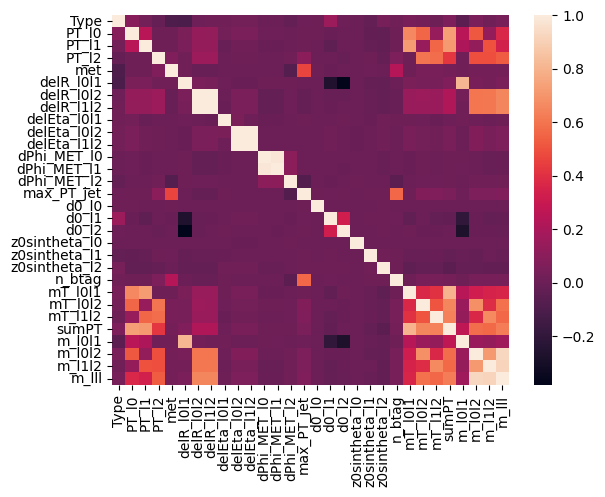

In [60]:
corr_df = df_p.corr()

corr_df.dropna()

sns.heatmap(corr_df,
           xticklabels = corr_df.columns,
           yticklabels=corr_df.columns,
           )
plt.savefig('/localscratch/corro_plot.png')

In [ ]:
featurenames = ['delPhi_l1l2','dRmin']

display_vars = ['delPhi_l1l2', 'dRmin']

#['PT_l0', 'PT_l1', 'PT_l2', 'met','metPhi', \
 #      'm_l0l1','m_l0l2', 'm_l1l2', 'm_lll', \
  #     'mT_l0l1', 'mT_l0l2','mT_l1l2','delPhi_l0l1','delPhi_l0l2',\
   #             'delPhi_l1l2','delR_l0l1','delR_l0l2', 'delR_l1l2','sumPT','dRmin']


sample = df_p

g = sns.pairplot(sample, vars=display_vars, hue='Type')

for feature in featurenames:
    sns.distplot(df_WWW[feature].astype('float64'), kde=False, label='WWW', color='red')
    sns.distplot(df_VH[feature].astype('float64'), kde=False, label='VH', color='cyan')
    sns.distplot(df_bkg[feature].astype('float64'), kde=False, label='bkg', color='blue')

In [ ]:
#scale to given luminosity
lumi=400 #inverse fb

n_sig=lumi*xSection_sig*1000
n_bkg=lumi*xSection_bkg*1000

weight_sig=n_sig/N_root_sig
weight_bkg=n_bkg/N_root_bgk

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
bins=np.linspace(0.,500.,100)
ax[0].hist([df_VH['met'],df_WWW['met'],df_bkg['met']],bins=bins,
        weights=[np.full(df_VH['met'].shape,weight_sig),
                 np.full(df_WWW['met'].shape,weight_sig),
                 np.full(df_bkg['met'].shape,weight_bkg)],
        histtype='bar', stacked=True,label=["VH","WWW","bkg"])
ax[0].set_yscale('log')
ax[0].text(0.55,0.95,"${\\cal L}=%3.0f$/fb"%lumi,transform=ax[0].transAxes)
ax[0].set_xlabel("MET [GeV]")
ax[0].set_ylabel("Entries")
ax[0].legend()

bins=np.linspace(0.,4.,80)
ax[1].hist([df_VH['dRmin'],df_WWW['dRmin'],df_bkg['dRmin']],bins=bins,
        weights=[np.full(df_VH['dRmin'].shape,weight_sig),
                 np.full(df_WWW['dRmin'].shape,weight_sig),
                 np.full(df_bkg['dRmin'].shape,weight_bkg)],
        histtype='step', stacked=False,density=True,label=["VH","WWW","bkg"])
ax[1].set_yscale('log')
ax[1].text(0.55,0.95,"${\\cal L}=%3.0f$/fb"%lumi,transform=ax[1].transAxes)
ax[1].set_xlabel("min($\\Delta R_{\\ell\\ell})$")
ax[1].set_ylabel("1/N dN/d min($\\Delta R_{\\ell\\ell})$")
ax[1].legend()